<a href="https://colab.research.google.com/github/Parthsarthi-lab/Machine-Learning-Projects/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1566806560_lesson_9_project/car_evaluation.csv")
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# EDA

In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,4,4,big,med,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
for col in df.columns:
  print("{} \n{}\n".format(col,df[col].value_counts()))

buying 
vhigh    432
med      432
high     432
low      432
Name: buying, dtype: int64

maint 
vhigh    432
med      432
high     432
low      432
Name: maint, dtype: int64

doors 
4        432
5more    432
3        432
2        432
Name: doors, dtype: int64

persons 
4       576
more    576
2       576
Name: persons, dtype: int64

lug_boot 
big      576
med      576
small    576
Name: lug_boot, dtype: int64

safety 
med     576
high    576
low     576
Name: safety, dtype: int64

class 
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



Leaving column "class" ,in all the columns the values are equally distributed

In [ ]:
# Using label encoder
encoder = LabelEncoder()
for col in df.columns:
  df[col] = encoder.fit_transform(df[col])
print(df.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


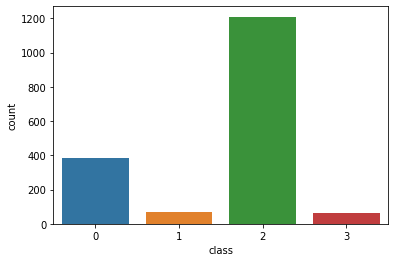

In [ ]:
sns.countplot(df['class'])

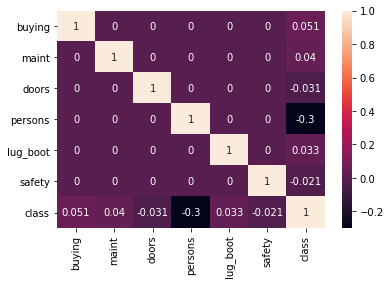

In [ ]:
# Correlations
correlation = df.corr()
sns.heatmap(correlation,annot=True)

Most of the columns have very weak correlation with the column "CLASS"

In [ ]:
X = df.drop(labels=['class'],axis=1)
y = df['class']

MODELS THAT CAN BE MADE -- <BR>


*  Logistic Regression
*   Random Forest-
*   SVM
*   Gradient Boosting
*   AdaBoost
*   XGBOOST







In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

kfold = model_selection.KFold(n_splits=10,shuffle=True)
logreg = LogisticRegression()
acc = model_selection.cross_val_score(logreg,X,y,cv=kfold,scoring="accuracy")
print("Accuracy of Logistic Regression Model ",acc.mean())

Accuracy of Logistic Regression Model  0.6857474122865976


In [ ]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

kfold = model_selection.KFold(n_splits=10,shuffle=True)
rfc = RandomForestClassifier()
acc = model_selection.cross_val_score(rfc,X,y,cv=kfold,scoring="accuracy")
print("Accuracy of Random Forest Classifier  is  ",acc.mean())

Accuracy of Random Forest Classifier  is   0.9832101088856028


In [ ]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

kfold = model_selection.KFold(n_splits=10,shuffle=True)
rfc = RandomForestClassifier(n_estimators=50,criterion="entropy",max_depth=10,max_features=6,max_leaf_nodes=None)
acc = model_selection.cross_val_score(rfc,X,y,cv=kfold,scoring="accuracy")
print("Accuracy of Random Forest Classifier  with hyperparameter tuning is  ",acc.mean())

Accuracy of Random Forest Classifier  with hyperparameter tuning is   0.9797385401263611


In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kfold = model_selection.KFold(n_splits=10,shuffle=True)
support_vm = SVC()
acc = model_selection.cross_val_score(support_vm,X,y,cv=kfold,scoring="accuracy")
print("Accuracy of SUPPORT VECTOR MACHINE ",acc.mean())

Accuracy of SUPPORT VECTOR MACHINE  0.9305719854819197


In [ ]:
# Gradient BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

kfold = model_selection.KFold(n_splits=10,shuffle=True)
gb_boost = GradientBoostingClassifier()
acc = model_selection.cross_val_score(gb_boost,X,y,cv=kfold,scoring="accuracy")
print("Accuracy of Gradient Boosting is  ",acc.mean())

Accuracy of Gradient Boosting is   0.9826387955370344


In [ ]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

kfold = model_selection.KFold(n_splits=10,shuffle=True)
abc = AdaBoostClassifier(n_estimators=30,random_state=7)
acc = model_selection.cross_val_score(abc,X,y,cv=kfold,scoring="accuracy")
print("Accuracy of AdaBoostClassifier is  ",acc.mean())

Accuracy of AdaBoostClassifier is   0.7668268584487162


In [ ]:
# XGBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

kfold = model_selection.KFold(n_splits=10,shuffle=True)
xg_boost = XGBClassifier()
acc = model_selection.cross_val_score(xg_boost,X,y,cv=kfold,scoring="accuracy")
print("Accuracy of XGBOOST is  ",acc.mean())

Accuracy of XGBOOST is   0.9403985750772954


COMPARING THE ACCURACY -- <BR>
Accuracy of Logistic Regression Model  0.6857474122865976 <BR>
Accuracy of Random Forest Classifier  is   0.9832101088856028<BR>
Accuracy of Random Forest Classifier  with hyperparameter tuning is   0.9797385401263611<BR>
Accuracy of SUPPORT VECTOR MACHINE  0.9305719854819197<BR>
Accuracy of Gradient Boosting is   0.9826387955370344<BR>
Accuracy of AdaBoostClassifier is   0.7668268584487162<BR>
Accuracy of XGBOOST is   0.9403985750772954<BR>


THEREFORE THE ACCURACY OF  **RANDOM FOREST CLASSIFIER**  IS THE HIGHEST
**0.9832101088856028**